In [6]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 22.5 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [321]:
! ls ../Exps/GAN_PI

GAN_PI_1	     GAN_PI_LL_s20		GAN_PI_l5
GAN_PI_G_w100_LL_s5  GAN_PI_LL_s20_r5		GAN_PI_low_stochastic
GAN_PI_G_w200_LL_s5  GAN_PI_LL_s30		GAN_PI_red
GAN_PI_Gl5_Dl6	     GAN_PI_LL_s5_lr4		GAN_PI_w_1
GAN_PI_Gl6_Dl5	     GAN_PI_LL_s5_r5		GAN_PI_w_2
GAN_PI_LL_s10	     GAN_PI_enforce_supervised	GAN_PI_w_l3
GAN_PI_LL_s10_PDELL  GAN_PI_higher_stochastic


In [9]:
root="../Exps/GAN_PI"

In [332]:
model_id="GAN_PI_LL_s10_PDELL"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

In [412]:
hist[1]["train"].keys()

dict_keys(['discriminative_losses', 'generative_losses'])

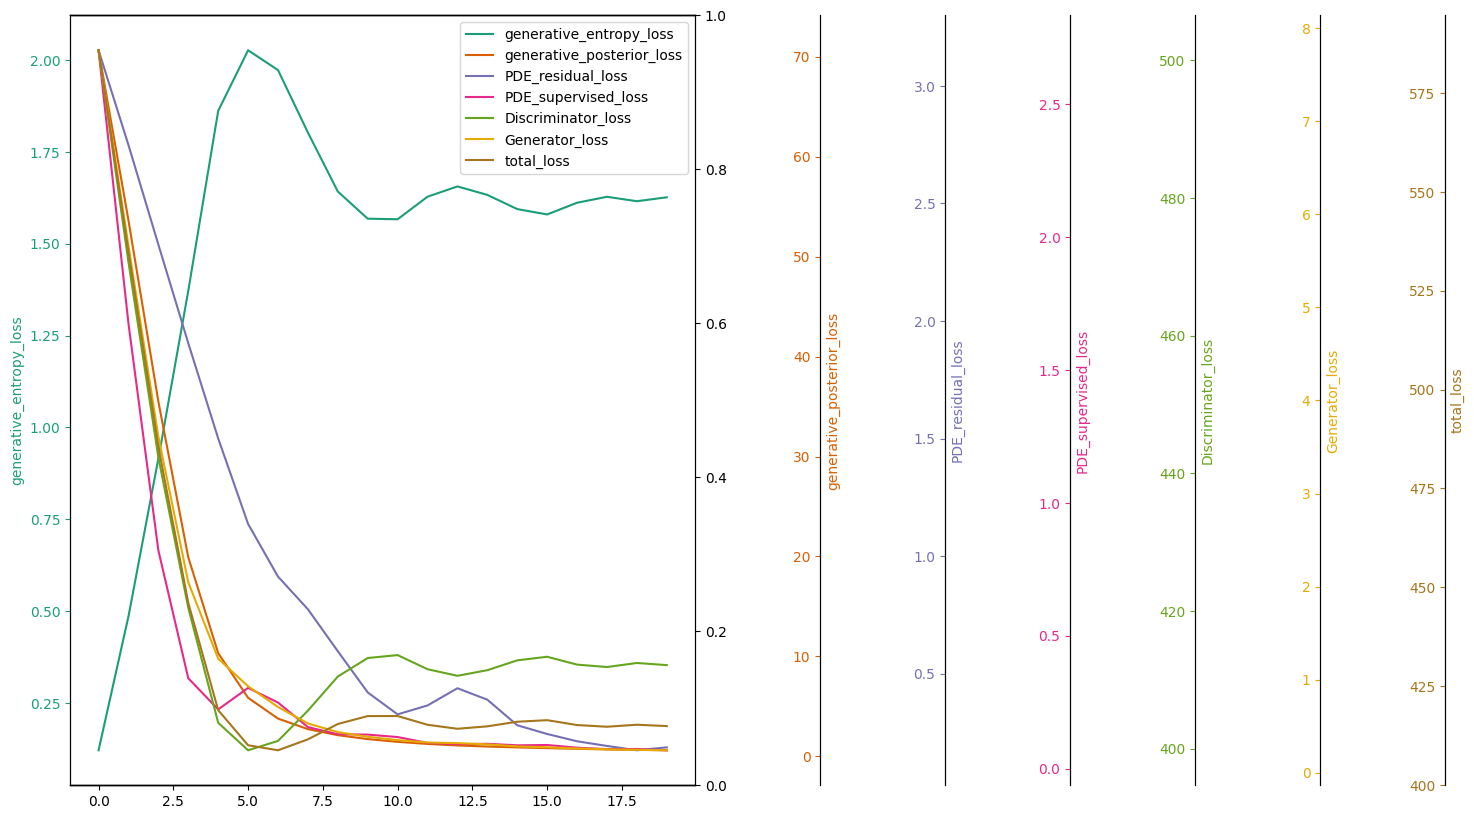

In [414]:

#plt.plot(step_loss["PDE_supervised_loss"][-100:])

step_loss={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

inidx_1=0
inidx_2=20
fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()

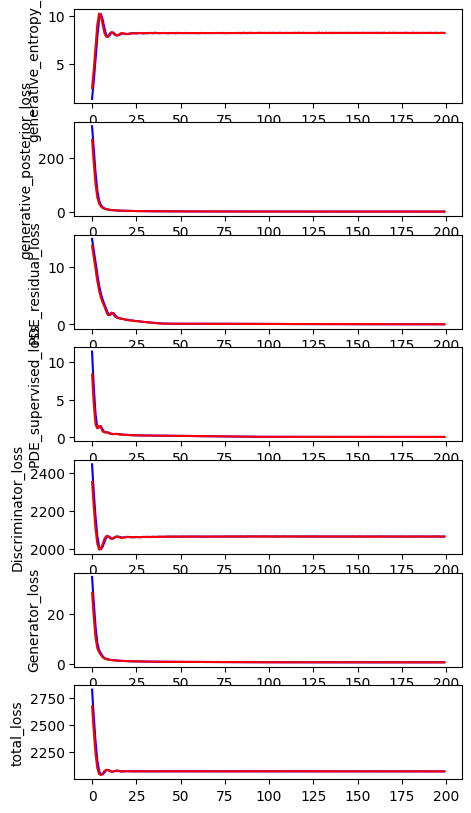

In [455]:
step_loss_train={}
step_loss_test={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss_train[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

for k in hist[1]["test"]["generative_losses"][0].keys():
    step_loss_test[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
    )
    

inidx_1=0
inidx_2=200
#fig,axs=plt.subplots(figsize=(5,5))
fig=plt.figure(figsize=(5,10))

t_lines=[]
axs=fig.subplots(len(step_loss.keys()),1)
for i,(ax,k) in enumerate(zip(axs,step_loss.keys())):
    line=ax.plot(np.arange(len(step_loss_train[k][inidx_1:inidx_2])),step_loss_train[k][inidx_1:inidx_2],color='b',label=k)
    line=ax.plot(np.arange(len(step_loss_test[k][inidx_1:inidx_2])),step_loss_test[k][inidx_1:inidx_2],color='r',label=k)
    ax.set(ylabel=k)
    t_lines.append(line)
    axss.append(axs)

plt.show()

In [419]:
fig.add_subplot?

Signature: fig.add_subplot(*args, **kwargs)
Docstring:
Add an `~.axes.Axes` to the figure as part of a subplot arrangement.

Call signatures::

   add_subplot(nrows, ncols, index, **kwargs)
   add_subplot(pos, **kwargs)
   add_subplot(ax)
   add_subplot()

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will
      take the *index* position on a grid with *nrows* rows and
      *ncols* columns. *index* starts at 1 in the upper left corner
      and increases to the right.  *index* can also be a two-tuple
      specifying the (*first*, *last*) indices (1-based, and including
      *last*) of the subplot, e.g., ``fig.add_subplot(3, 1, (1, 2))``
      makes a subplot that spans the upper 2/3 of the figure.
    - A 3-digit integer. The digits are interpreted as if given
      separately as three single-digit integers, i.e.
      ``f

In [347]:
list(step_loss.keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']